<a href="https://colab.research.google.com/github/Dharsenipriya/Ai_based_collab_project/blob/main/predict_salary_emp_before_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/sample_data/Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [85]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [81]:
df.dropna(inplace = True)


In [56]:
df['Gender'] = df['Gender'].astype('category').cat.codes                      #categorical encoding
df['Education Level'] =  df['Education Level'].astype('category').cat.codes
df['Job Title'] =  df['Job Title'].astype('category').cat.codes

In [57]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [58]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    int8   
 2   Education Level      324 non-null    int8   
 3   Job Title            324 non-null    int16  
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), int16(1), int8(2)
memory usage: 11.4 KB


In [ ]:
''' co-variance , co-relation ,
    near 0 is irrelavant , + highly inversely prop , - highly dir. prop                rm only if it's logical & near 0
    axis 1-col & 0-row
    in describe - count must be = , mean - know thersold pt. of avg max pred, std - overall patern deviation ,
    outlier - disturb the pattern
    upper & lower bound - q0 & q4 ,center line - median
    q0 - q1 - q2 - q3 - q4 ( 1)ascending order
    2)  )
    if no need outliers then no need scaling & handling outlier
    it's a random spliting - random state helps in getting same result/accuracy -
    linear - for linear pattern & cluster , logistic -  for linear pattern & classification

'''

In [59]:
df.corr()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.025034,0.540383,0.118619,0.979192,0.916543
Gender,-0.025034,1.000000,-0.024470,0.039072,-0.001367,0.075420
Education Level,0.540383,-0.024470,1.000000,0.113519,0.573912,0.661900
Job Title,0.118619,0.039072,0.113519,1.000000,0.105513,0.135939
Years of Experience,0.979192,-0.001367,0.573912,0.105513,1.000000,0.924455
Salary,0.916543,0.075420,0.661900,0.135939,0.924455,1.000000


In [60]:
df = df.drop('Gender',axis = 1)
df

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,159,5.0,90000.0
1,28.0,1,17,3.0,65000.0
2,45.0,2,130,15.0,150000.0
3,36.0,0,101,7.0,60000.0
4,52.0,1,22,20.0,200000.0
...,...,...,...,...,...
348,28.0,0,68,1.0,35000.0
349,36.0,0,111,8.0,110000.0
350,44.0,2,115,16.0,160000.0
351,31.0,0,63,3.0,55000.0


In [61]:
df.describe()

,Age,Education Level,Job Title,Years of Experience,Salary
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,37.382716,0.540123,88.956790,10.058642,99985.648148
std,7.185844,0.713597,47.106736,6.650470,48652.271440
min,23.000000,0.000000,0.000000,0.000000,350.000000
25%,31.000000,0.000000,49.750000,4.000000,55000.000000
50%,36.500000,0.000000,91.500000,9.000000,95000.000000
75%,44.000000,1.000000,132.000000,16.000000,140000.000000
max,53.000000,2.000000,173.000000,25.000000,250000.000000


<Axes: >

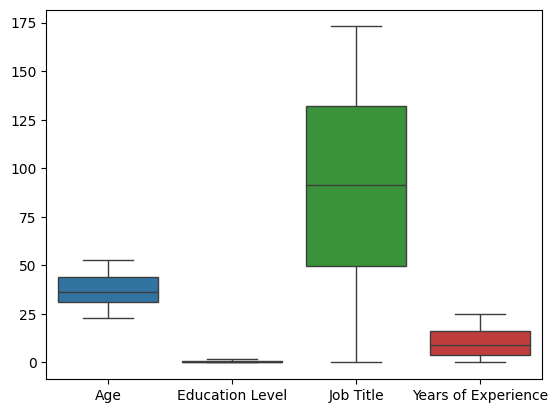

In [62]:
x = df.drop('Salary',axis=1)
y = df['Salary']
sns.boxplot(x)


<Axes: ylabel='Salary'>

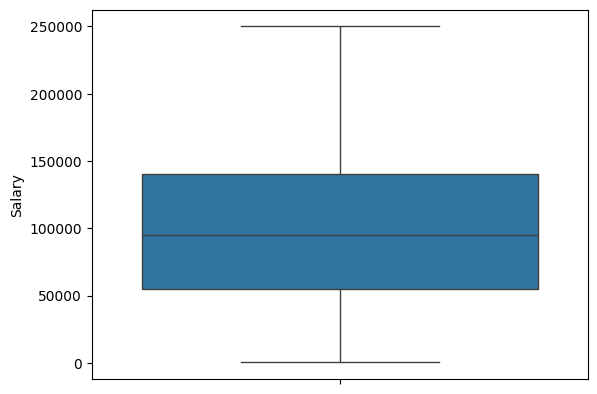

In [63]:
sns.boxplot(y)

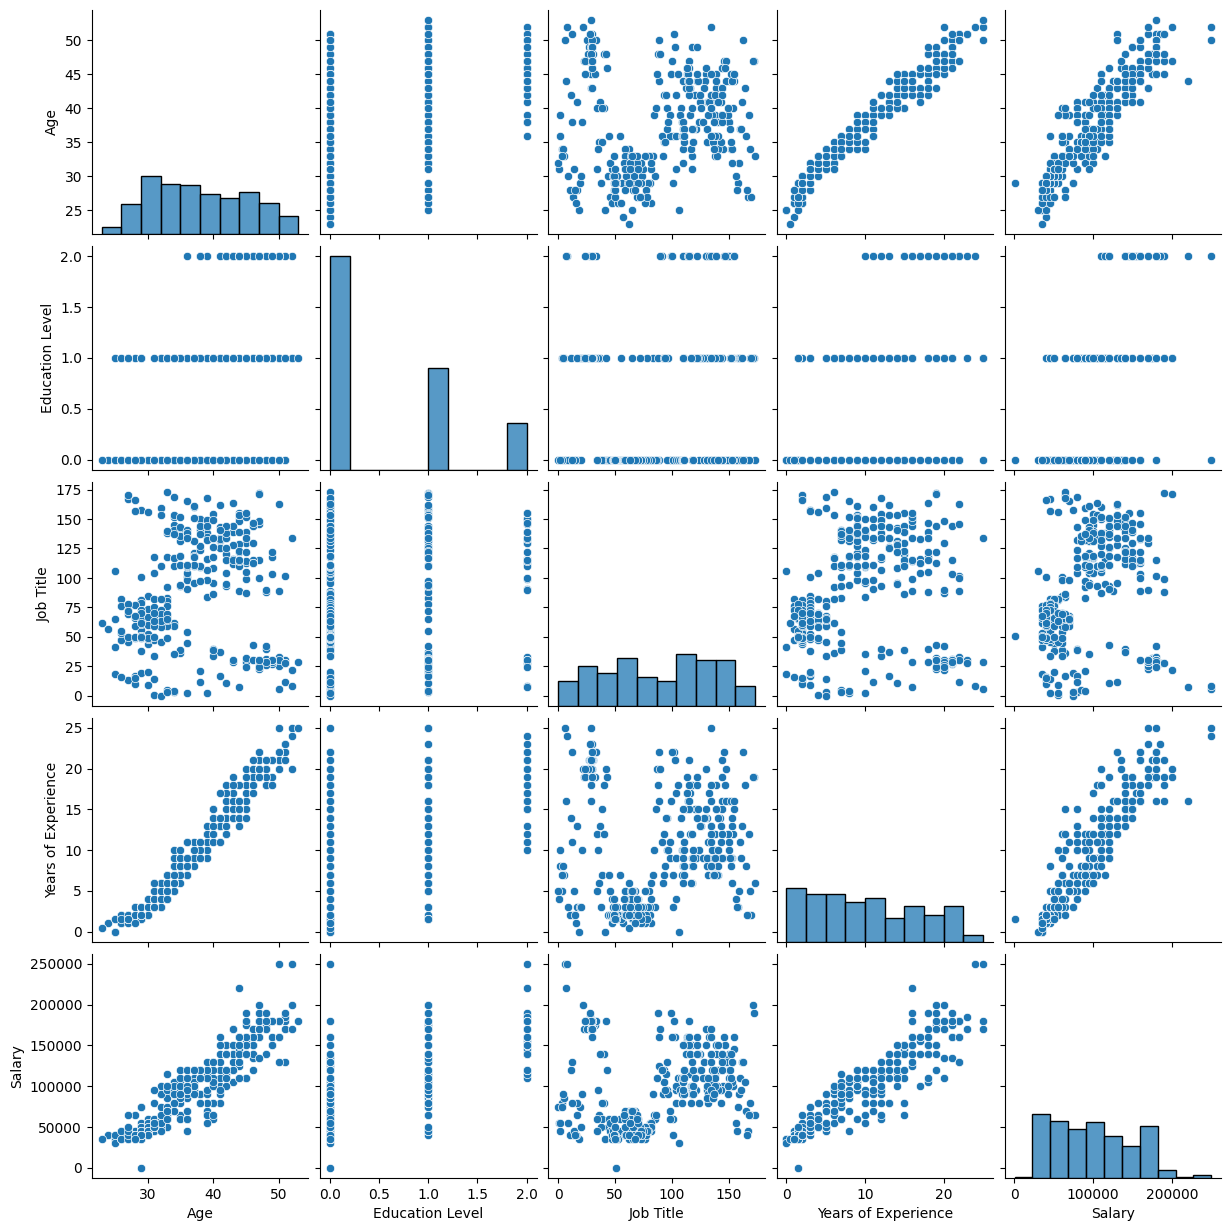

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
sns.pairplot(df)

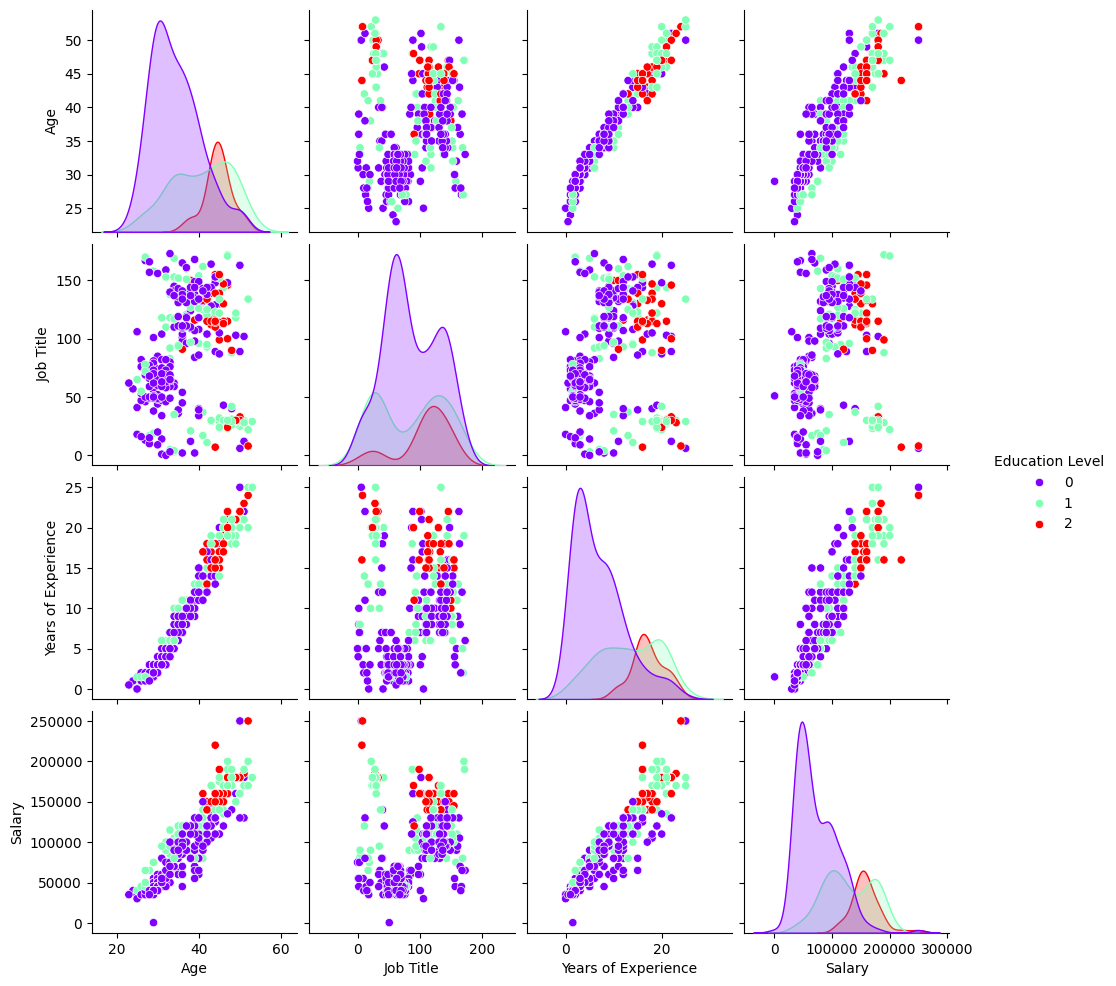

In [65]:
sns.pairplot(df,hue="Education Level",palette= 'rainbow')

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8675174051037118

In [69]:
lr.coef_

array([2.62746125e+03, 1.45255814e+04, 4.66708480e+00, 3.11821942e+03])

In [70]:
lr.intercept_

np.float64(-38059.67419413128)

In [71]:
import pickle as pkl
pkl.dump(lr,open('Salary.pkl','wb'))

In [72]:
import gradio as gr
sl = pkl.load(open('/content/Salary.pkl','rb'))

In [73]:
sl.predict([[30, 1, 150, 5]])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(71580.90457104695)

In [74]:
def salary_predict(age, el , jt, exp):
  d =  pd.DataFrame([[age, el, jt, exp]], columns = sl.feature_names_in_)
  return sl.predict(d)[0]

In [75]:
inter = gr.Interface(fn = salary_predict,
                     inputs = [
                      gr.Number(label = 'Age'),
                      gr.Number(label = 'Education Level'),
                      gr.Number(label = 'Job Title'),
                      gr.Number(label = 'Experience')
                     ],
                     outputs = gr.Textbox(label = "Predicted Salary"),
                     title = "Salary Predictor")
inter.launch(inline = True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d6965dd4d6d3eee17.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [77]:
# Load the data again to access the original categorical 'Job Title'
df_original = pd.read_csv("/content/sample_data/Salary Data.csv")

# Drop missing values
df_original.dropna(inplace=True)

# Convert 'Job Title' to category dtype
df_original['Job Title'] = df_original['Job Title'].astype('category')

In [79]:
# Create a mapping from encoded job title to original job title using the original dataframe
job_title_mapping = dict(zip(df_original['Job Title'].cat.codes, df_original['Job Title'].cat.categories))
job_title_mapping_reversed = dict(zip(df_original['Job Title'].cat.categories, df_original['Job Title'].cat.codes))

# Create a mapping from encoded education level to original education level using the original dataframe
education_level_mapping = dict(zip(df_original['Education Level'].astype('category').cat.codes, df_original['Education Level'].astype('category').cat.categories))
education_level_mapping_reversed = dict(zip(df_original['Education Level'].astype('category').cat.categories, df_original['Education Level'].astype('category').cat.codes))


# Update the salary_predict function to accept job title and education level as strings and convert them to the encoded values
def salary_predict(age, el , jt, exp):
  encoded_jt = job_title_mapping_reversed[jt]
  encoded_el = education_level_mapping_reversed[el]
  d =  pd.DataFrame([[age, encoded_el, encoded_jt, exp]], columns = sl.feature_names_in_)
  return sl.predict(d)[0]

# Update the Gradio interface to use a dropdown for Job Title and Education Level
inter = gr.Interface(fn = salary_predict,
                     inputs = [
                      gr.Number(label = 'Age'),
                      gr.Dropdown(list(education_level_mapping.values()), label = 'Education Level'), # Use dropdown with original education levels
                      gr.Dropdown(list(job_title_mapping.values()), label = 'Job Title'), # Use dropdown with original job titles
                      gr.Number(label = 'Experience')
                     ],
                     outputs = gr.Textbox(label = "Predicted Salary"),
                     title = "Salary Predictor")
inter.launch(inline = True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1ce3e604fab2b86be.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
